#**A Low Phase-Noise Tunable Differential Clock Generator**
##**Phase Locked Loop (PLL)**

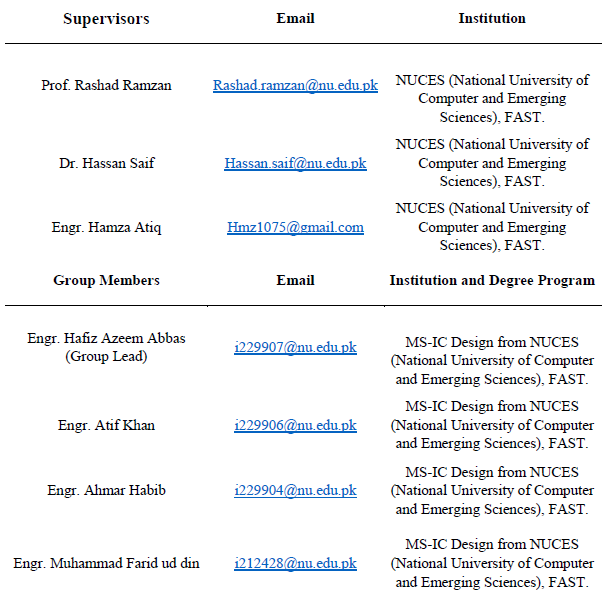

## **Abstract**
This proposal focuses on the development of an on-chip clock generator, Phase Locked Loop (PLL), specifically designed for DACs and ADCs, inspired by the capabilities of the Digilent Analog Discovery 2™. The proposed PLL design includes key components such as Phase Frequency Detector (PFD), Charge Pump, Loop Filter, Voltage Controlled Oscillator (VCO) and N-Divider. The primary goal of the proposed PLL is to generate a low phase noise differential 200 MHz clock for ADCs and 100 MHz single-ended clock for DACs. The proposed design aims to reduce the phase noise, which is crucial for achieving a high Signal-to-Noise Ratio (SNR) in data converters. The proposal presents schematic diagrams and simulation results of the entire PLL design, which achieves a low level jitter of 396.2 fsec, a phase noise of -114.3 dBc/Hz at an offset of 1 MHz frequency, a tunable frequency range of 180 MHz to 220 MHz with step size of 1 MHz, and a lock time of 4 µsec. The complete design has been implemented using TSMC 130 nm and 65 nm PDKs. At the end, simulation results for the VCO block of the PLL, implemented using the open-source tool XSCHEM, are presented. Future plan is to fully implement the PLL design on the GF180MCU PDK.

#### **Keywords** : *PLL, Low Phase Noise PLL, VCO, Charge Pump, Loop Filter*




## **Motivation**

The Digilent Analog Discovery 2™ is a powerful and multifaceted tool that boasts a wide range of functions, allowing users to measure, visualize, generate, record, and control mixed signal circuits of all types. Despite its low cost, this instrument is highly capable and compact as it provides the freedom to work with analog and digital circuits in any environment.

Drawing inspiration from this device, it is aimed to build the same maximum achievable functionality 'on-chip' for PCB measurements. Clock generator circuit is an integral part of the Analog Discovery and accuracy of the generated Clock is essential to ensure system quality parameters. In this proposal, a clock generator (PLL) is  proposed, which can be utilized as clock generator for Analog Discovery On-Chip prototype. The specification of the proposed PLL not only fulfills the specification required by clock generator of Analog Discovery, but also compatible with a large range of circuits. The PLL is capable of delivering a stable and accurate clock signal with low level jitter and phase noise, while also meeting the other performance requirements like minimum lock time of the system. This is particularly important in applications such as input source to data converters, where even small variations in the clock signal can result in significant SNR degradation in the entire system.



## **Problem Statement**

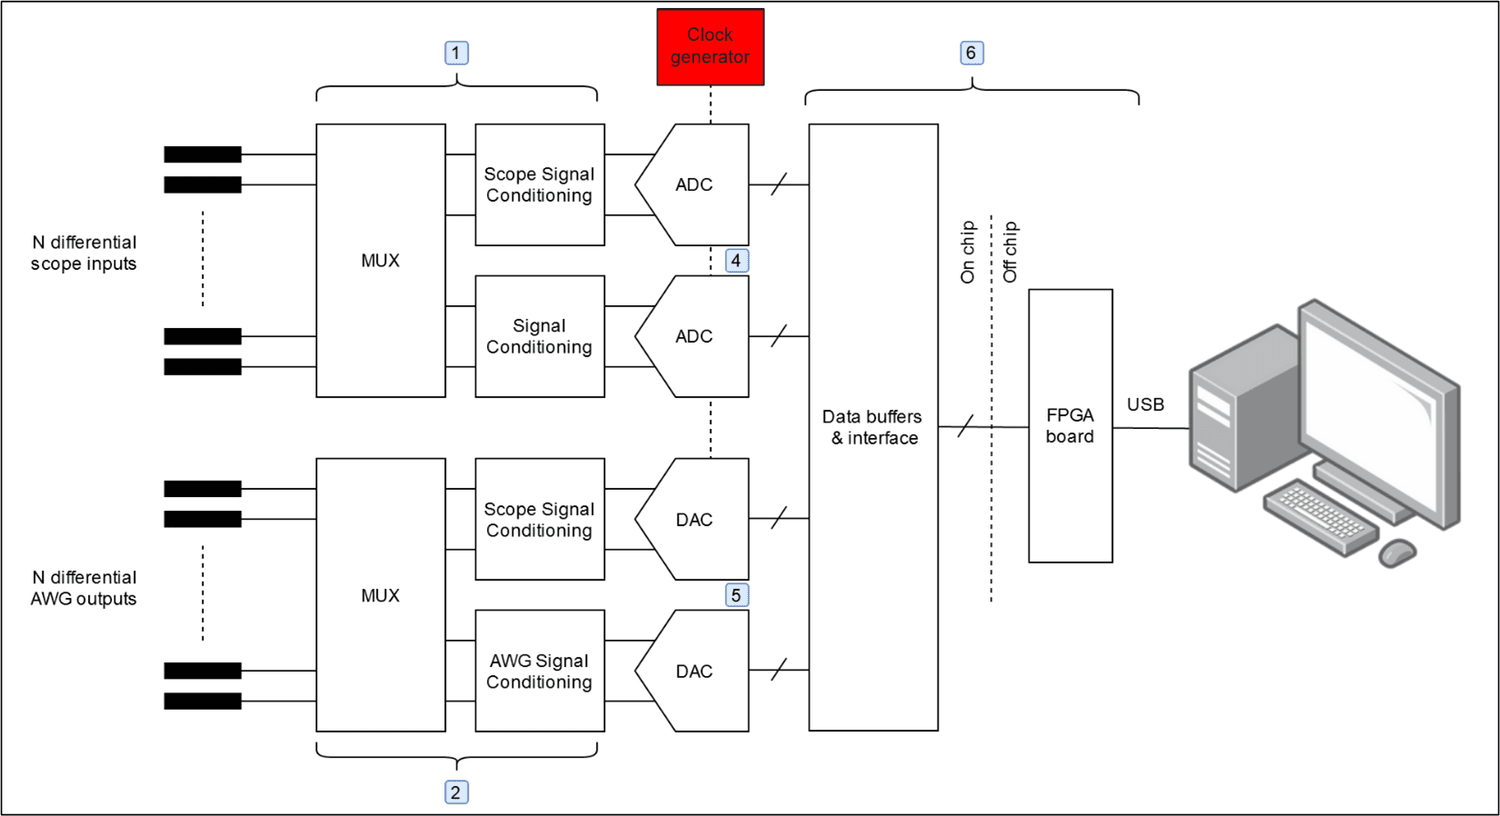

*Fig 01: Targeted block*


The focus of the team is to design the highlighted block as shown in figure 1, for the SSCS "PICO" Open-Source Chipathon IC Design Contest 2023. The aim is to showcase the effectiveness and performance of PLL design in meeting the contest's requirements as well as to contribute to the progress and development of open-source chip design. The team believes that sharing work and collaborating with other participants in the contest will foster innovation and drive advancements in the field.

## **Introduction - Proposed Design**
The Phase-Locked Loop (PLL) consists of Phase Frequency Detector (PFD), Charge Pump, Loop Filter, Voltage Controlled Oscillator (VCO), and N-Divider. The main objective in designing a PLL is to produce a precise and steady clock signal with minimal Jitter and phase noise. This ensures that the PLL does not significantly degrade the Signal-to-Noise Ratio (SNR) of Analog-to-Digital Converters (ADCs) and Digital-to-Analog Converters (DACs).

The proposed design shown below in figure 2 produces a consistent 100MHz clock signal for the DAC and a 200MHz differential clock for both ADCs. The system exhibits a low level jitter of 396.2fsec, phase noise of -114.3dBc/Hz at offset of 1MHz frequency, and offers an adjustable frequency range of 180MHz to 220MHz along with approximate lock time of 4µsec. 

A brief description of each component/block of the proposed PLL is provided below. Schematics and simulation results are also included. Furthermore, a comparison between the achieved specifications and the target specifications is presented at the end.

The PLL design has been implemented using TSMC 130nm and 65nm process design kits (PDKs). Moreover, simulation results for the Voltage Controlled Oscillator (VCO) design implemented on XSCHEM are included. In the future, we plan to fully implement the PLL design on the GF180MCU PDK.



## **Phase Locked Loop (PLL):**

**Block Diagram**
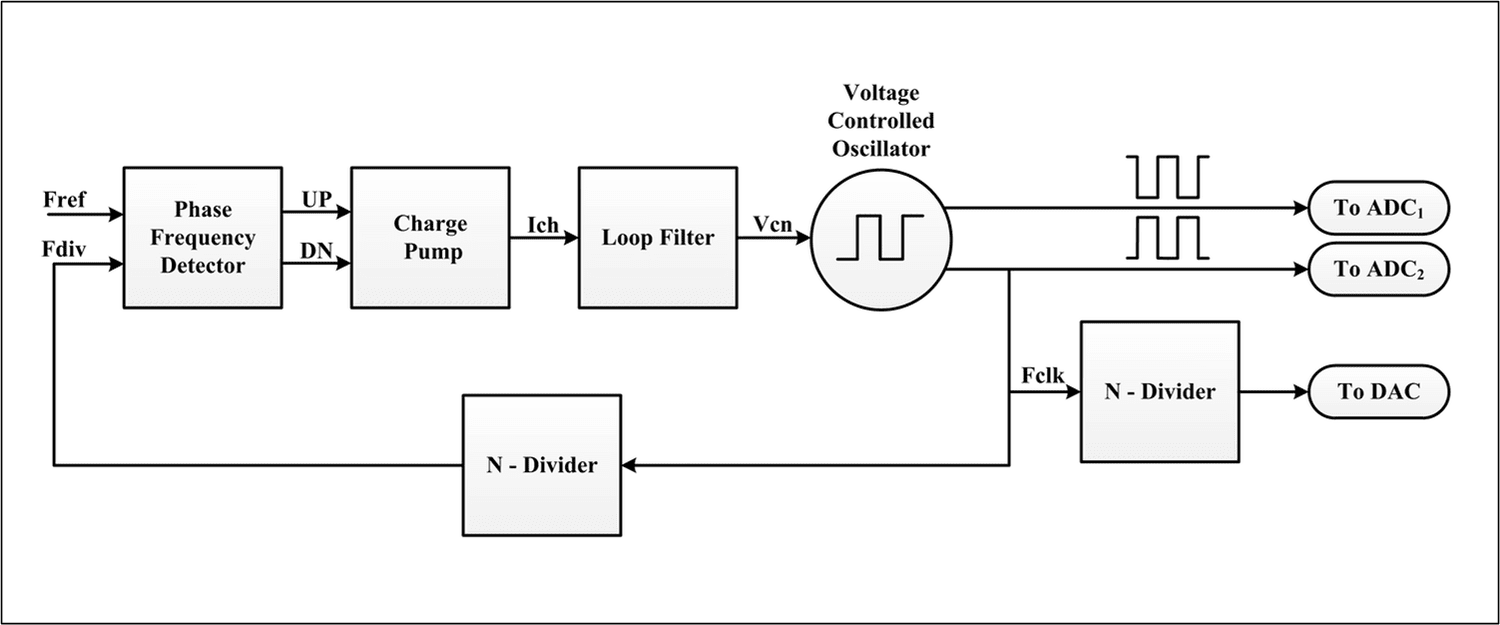


*Fig 02: Implemented PLL Block Diagram*

The proposed design as shown in figure 2 above uses tapered buffers at the output to counter the loading effects of ADCs and DACs.

### **Phase Frequency Detector (PFD):**

The jitter characteristics of a system are crucial when interfacing with  circuits that generate noise on the power supply rails. The dead zone, which refers to the range of undetectable phase differences, is a significant factor in measuring the performance of a phase frequency detector (PFD). A larger dead zone results in more jitter, but increasing the precision of the PFD can reduce jitter. The circuit speed is determined by the delay time required to reset all internal nodes. The dead zone occurs when the loop is locked, and the charge pump output remains unchanged for small changes in the input signals at the PFD. Any dead-zone width directly affects the PLL jitter and should be avoided.[1]

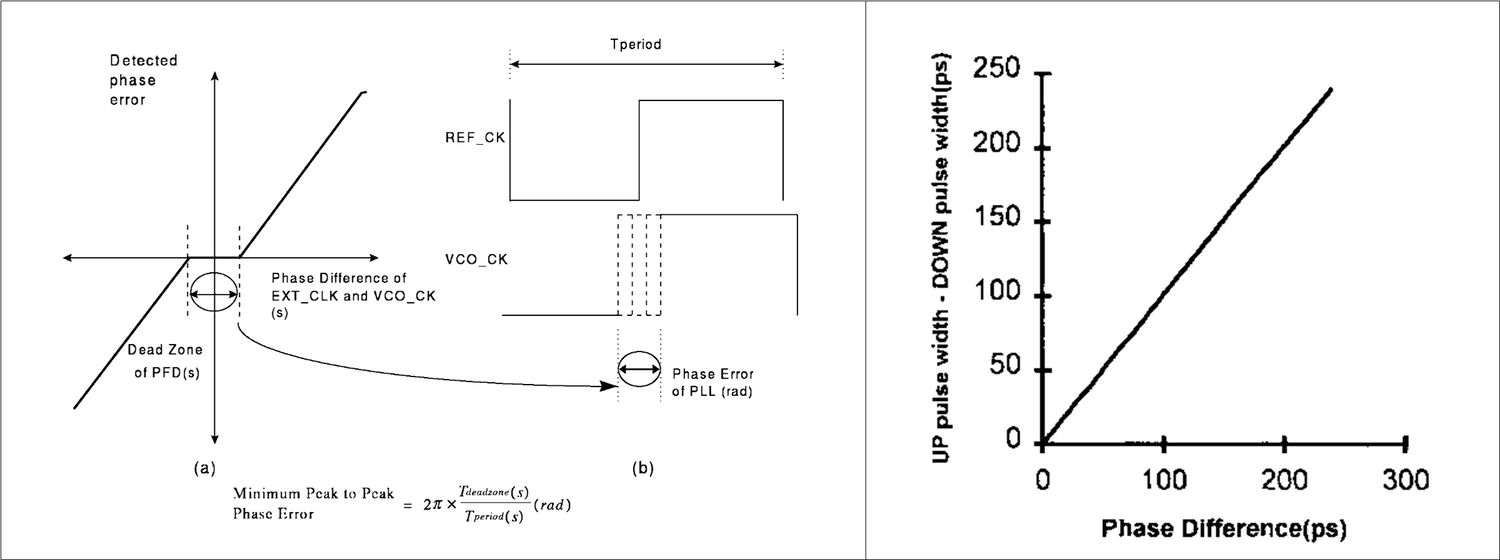

*Fig 03: Illustration of Dead Zone in PFD* [1]

The PFD that has been implemented with TSPC logic exhibits low jitter performance.

TSPC logic not only requires less hardware and power but also allows for designs with lower phase noise. By reducing the number of transistors and enabling faster transitions in the signal path, TSPC techniques result in circuits such as frequency dividers and phase/frequency detectors (PFDs) having less phase noise. [8] 

**Schematic**

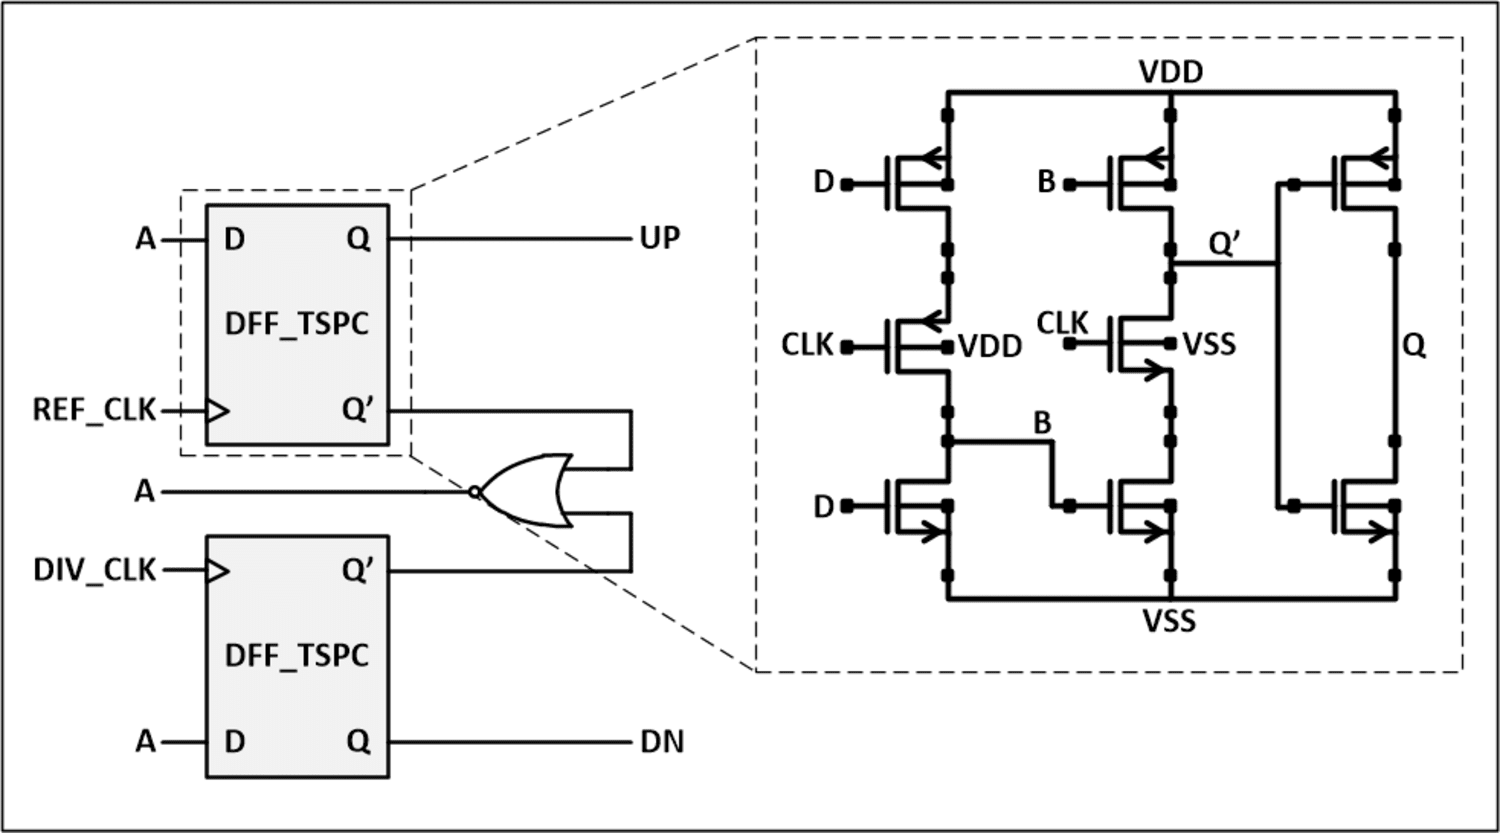

*Fig 05:  Schematic of DFF TSPC*

**Results**

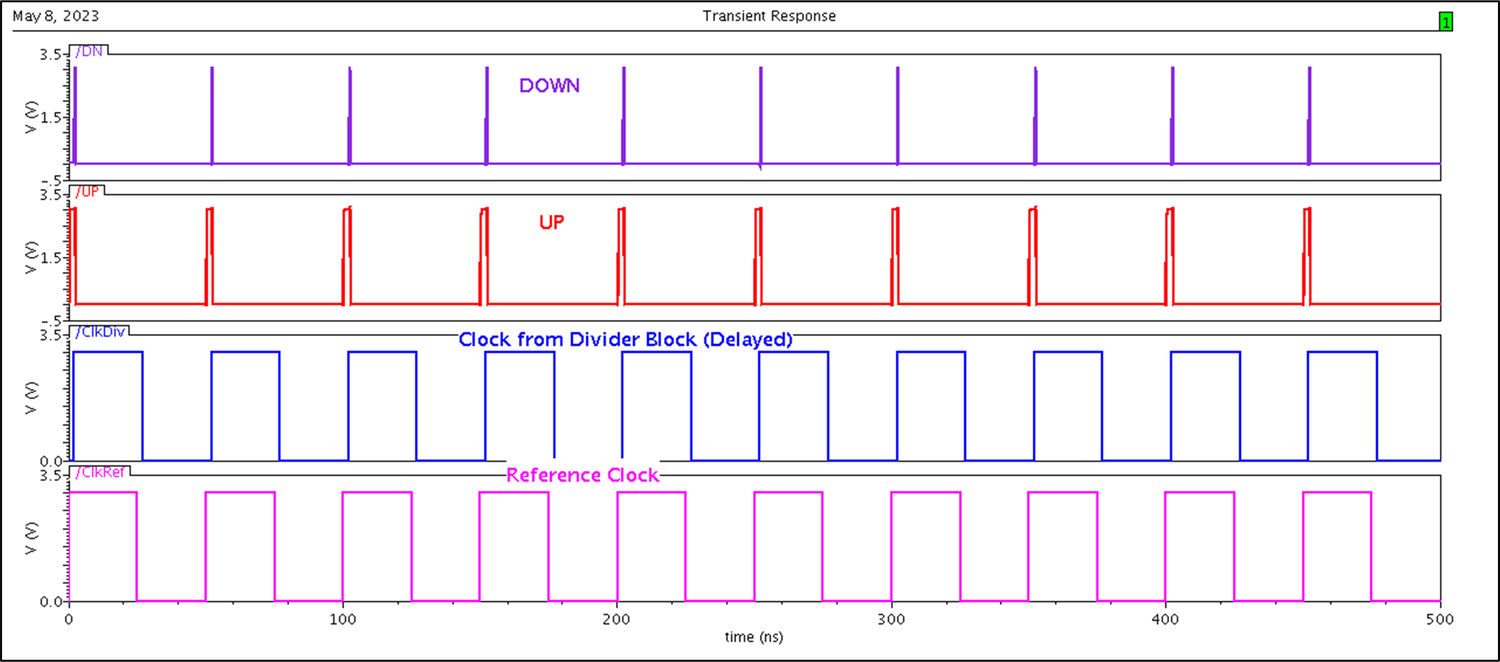

*Fig 06: Generation of UP Pulse when generated clock lags the reference clock*

Figure 6 presents the results indicating the generation of the UP pulse by the Phase Frequency Detector (PFD) when the phase of the Divider clock lags behind the Reference clock. The Divider clock represents the clock generated by the VCO after being divided by the factor N for comparison with the reference clock. The width of the UP and DN (Down) pulses is directly proportional to the phase difference between the reference clock and the output clock of the divider. The presence of the UP and DN pulses indicates that the frequency needs to be adjusted either upwards or downwards in order to align with the target frequency.

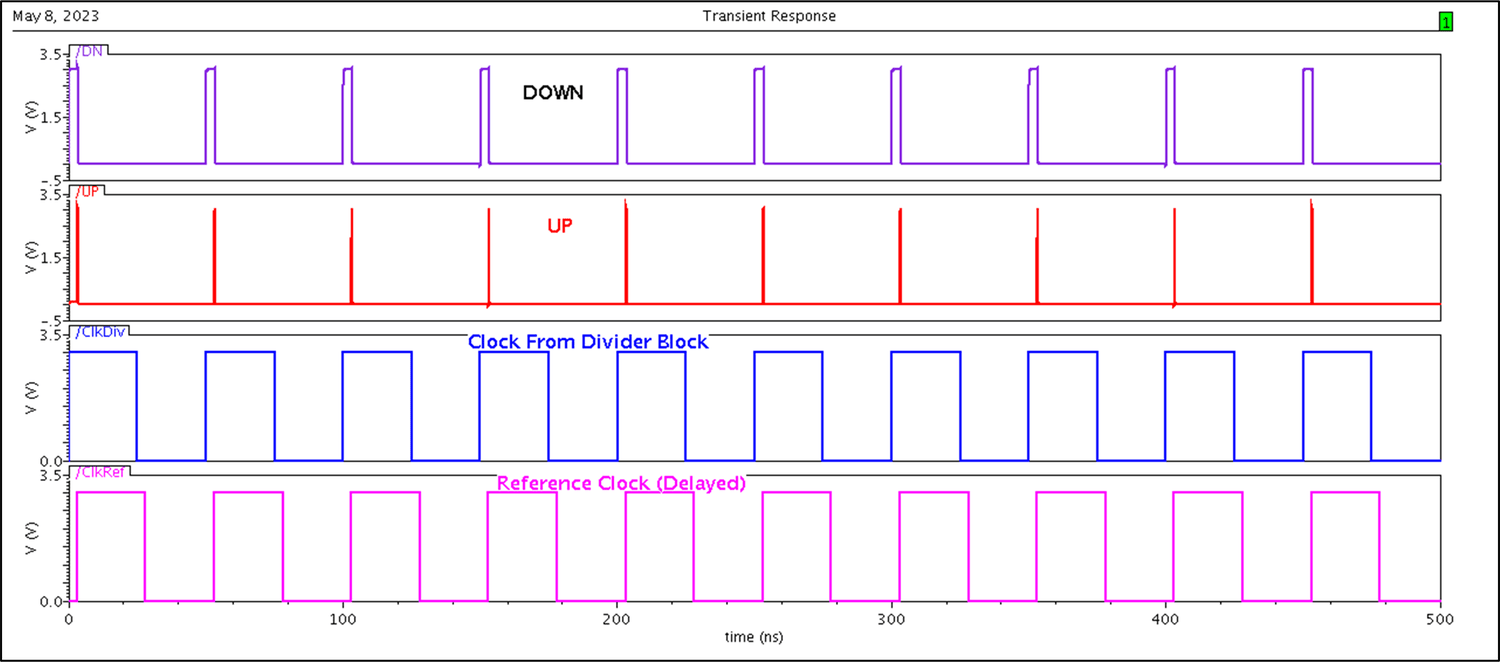

*Fig 07: Generation of DN Pulse when generated clock leads the reference clock*

The results depicted in figure 7 demonstrate the generation of the DN pulse when the phase of the Divider clock leads the Reference clock. The presence of the DN pulse indicates that the frequency needs to be slowed down in order to align with the desired frequency.

### **Charge Pump & Loop Filter:**

The loop filter serves as a low pass filter that converts the charge pump output current into a tuning voltage for the VCO. However, not just any ordinary low pass filter can be used. The transfer function of the loop filter is an integral part of the closed-loop PLL, which also includes parameters such as the N divider value, charge pump gain, and VCO gain. This closed-loop transfer function significantly impacts the switching speed, spurs, phase noise, and stability of the PLL.

For the transfer function to be stable, all poles of the closed-loop transfer function must have negative real parts. Loop filters with unstable transfer functions often exhibit phase margins of less than 20 degrees, and filters with lower phase margins tend to have more peaking in the closed-loop response.

The performance of a loop filter is theoretically determined by two design parameters: loop bandwidth and phase margin. These parameters uniquely define the zero, poles, and time constant of the loop filter, and ultimately affect its performance.

The loop bandwidth (BW) is the most critical design parameter, impacting spurs, phase noise, and lock time. It is essential to consider the loop bandwidth when discussing spurs or lock time. Wider loop bandwidths result in better lock times, but non-crosstalk-dominated spurs may increase. Within the loop bandwidth, the PLL phase noise is passed while the VCO phase noise is attenuated. A good starting point for minimizing jitter is the offset frequency where the PLL and VCO phase noise intersect. However, it may be necessary to adjust the loop bandwidth based on specific requirements for spurs and lock time. The maximum loop bandwidth is typically limited to one-tenth of the phase detector frequency and can also be constrained by the VCO input capacitance or forced loop filter component values.

The phase margin (φ) is defined as 180 degrees minus the phase of the open-loop gain at the loop bandwidth frequency. It should be greater than zero and less than 180 degrees. Typically, phase margins are chosen between 30 and 80 degrees. Simulations indicate that a phase margin of around 48 degrees is close to optimal for lock time, but higher phase margins up to 80 degrees are preferred for a flatter response and greater tolerance to variations in VCO gain. Lower phase margins may result in more peaking in the response but provide sharper cut-off for better spur attenuation. [2]

**Block Diagram:**

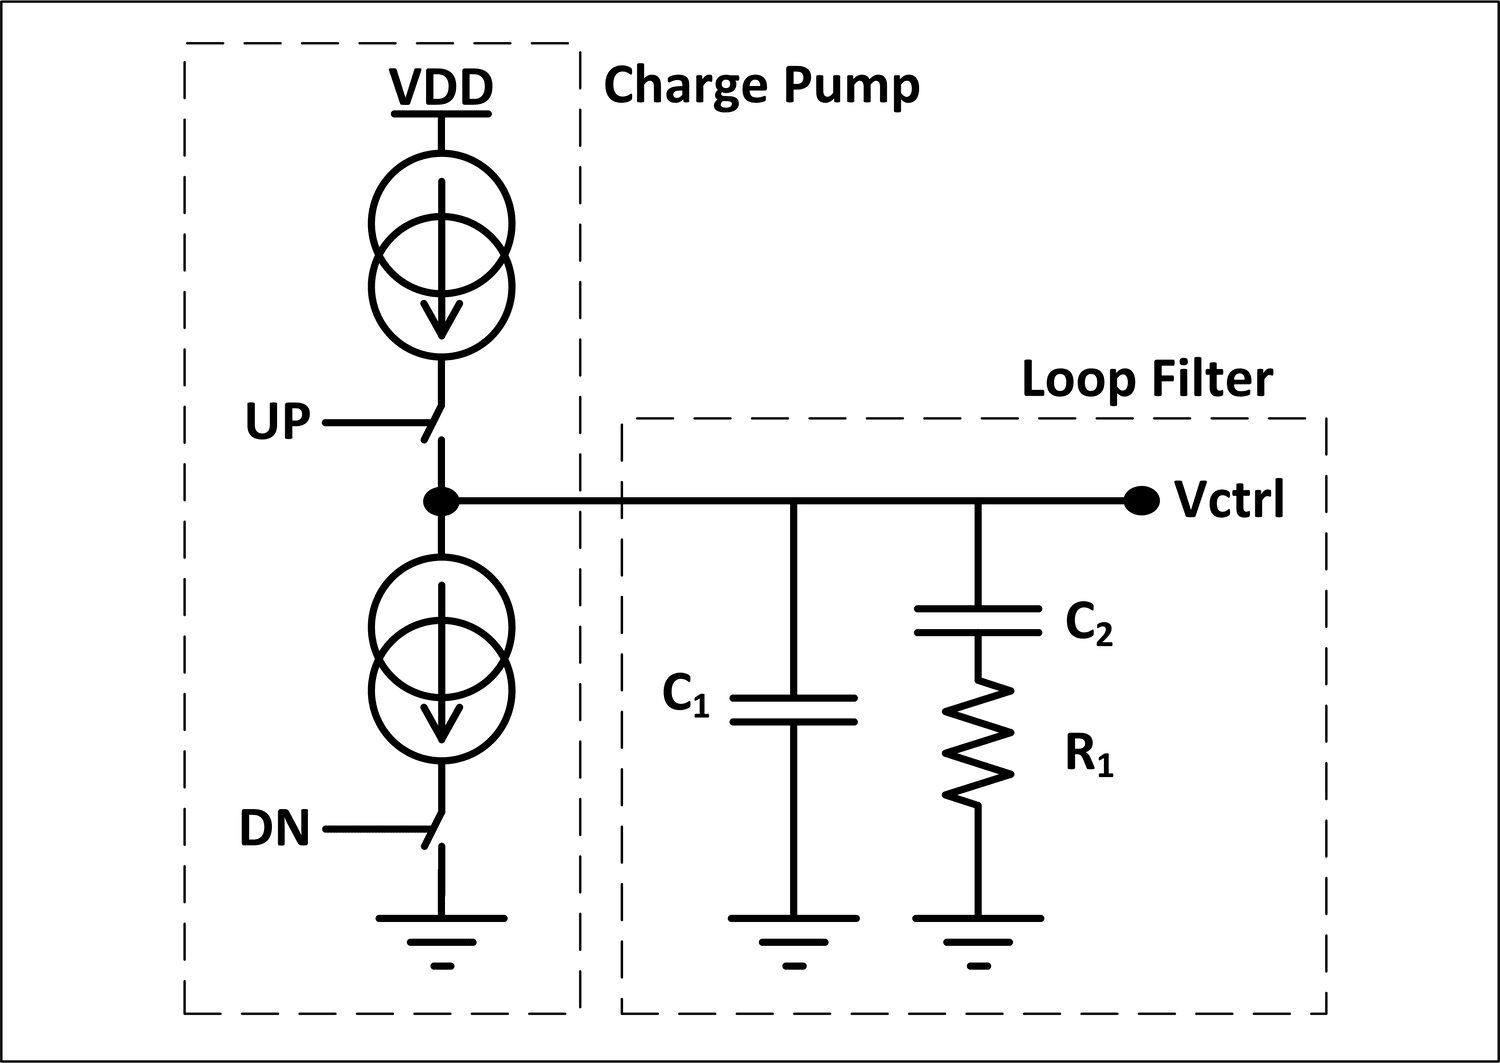

*Fig 08: Block diagram of charge pump and loop filter*

**Schematic:**

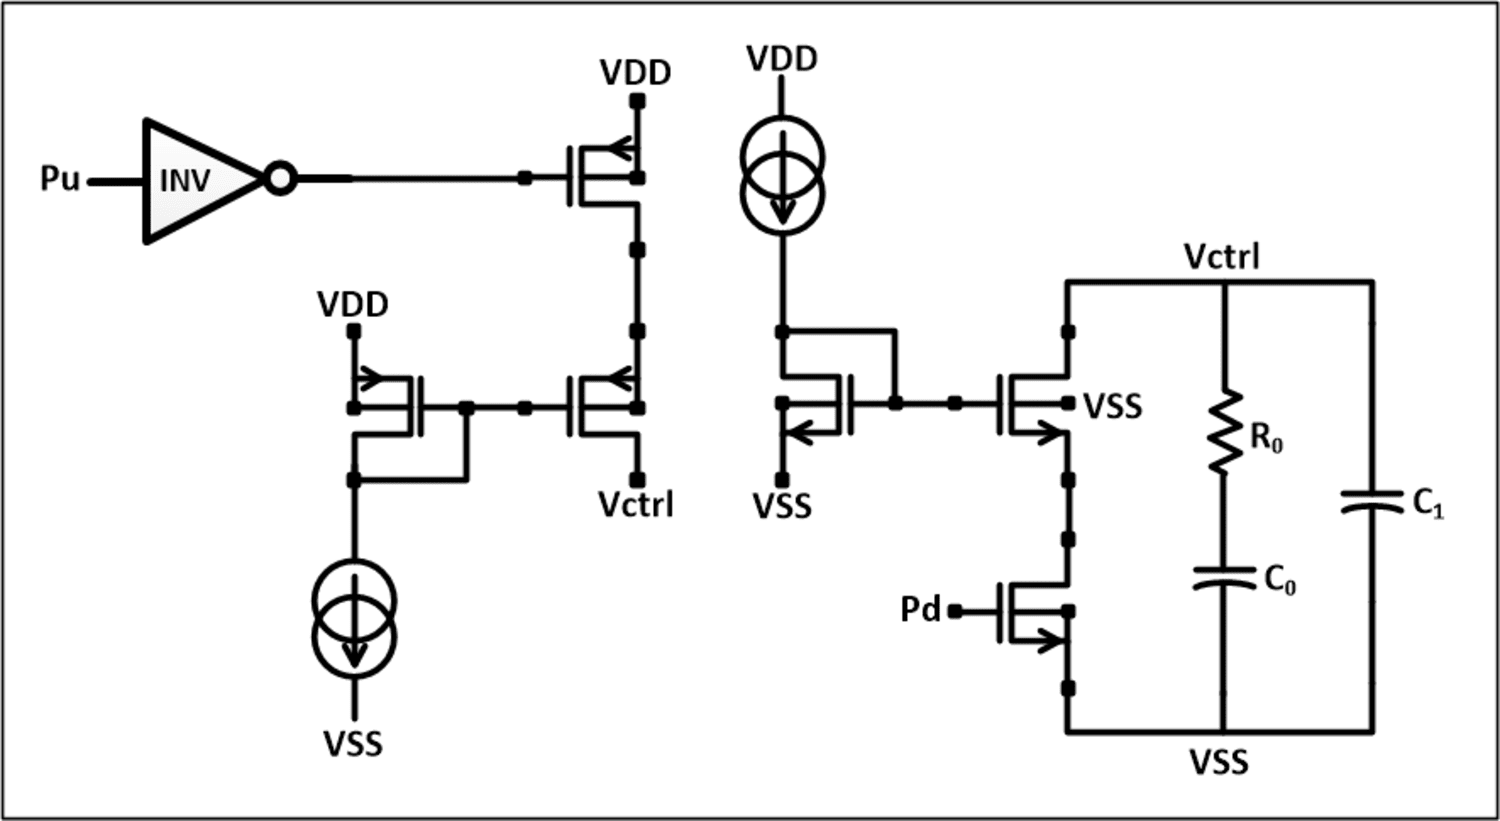

*Fig 09: Implemented charge pump and loop filter*

The figure 9 illustrates the connection between the charge pump and the loop filter. The outputs of the PFD, Pu and Pd, are connected to the charge pump. The Pull Up pulse activates the charging path of the loop filter, while the Pull Down pulse activates the discharging path. The duration of the DN and UP signals determines the charging and discharging times. The output of the charge pump provides an average value of the Vctrl voltage signal, which is then fed to the VCO block.

In our VCO design, the Vctrl signal is applied at the gate of the PMOS transistor. The PMOS transistor is strongly turned on when the voltage at the gate is around 0V and weakly turned on at higher voltages. Therefore, as the Vctrl signal increases, the frequency of the VCO slows down. To integrate the VCO with the charge pump and loop filter, we need to swap the DN and UP pulses that are coming from the PFD block.

The C1 capacitor in the loop filter is very small compared to C0 and serves the purpose of reducing any high-frequency noise. In future updates of this design, we will incorporate multiple branches in the charging and discharging paths to address the challenges posed by process corner variations.

**Loop Filter Design Calculations:**

The transfer function of loop filter:

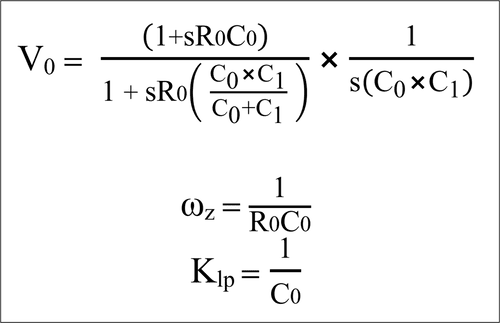

Typically, the value of Q falls within the range of 0.1 to 0.5. A lower Q value results in a shorter lock time, but it also leads to a weaker damping factor and impractical capacitor sizes. Considering the trade-off between achieving an optimal lock time, a suitable damping factor, and utilizing on-chip capacitors with small values, we have selected a Q value of 0.3. Additionally, we have chosen the 3dB cutoff frequency (ω3dB) to be 1/20th of the reference frequency (ωref).

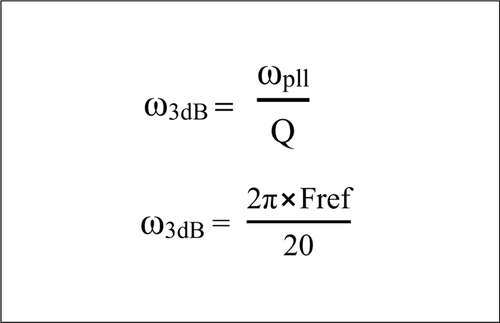

We have chosen Ich = 20μA

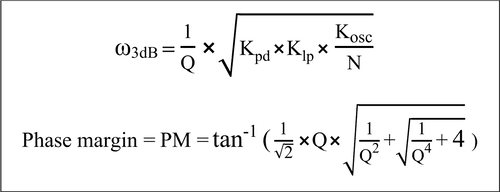

The calculated phase margin = 84.87 ̊. 

The calculated loop bandwidth = 1MHz.

The calculated lock time = 4/BW = 4 µsec



###**Voltage Controlled Oscillator (VCO):**

When designing a VCO (Voltage Controlled Oscillator), there is a tradeoff between four key factors that impact its performance: power consumption, phase noise, output frequency, and frequency range. Among these factors, phase noise holds the greatest significance in VCO performance. In applications such as high-speed digital-to-analog converters (DACs) and analog-to-digital converters (ADCs), having a clean, low-jitter sampling clock is crucial. Consequently, design efforts are focused on enhancing the phase noise of the oscillator to generate a clock signal with minimal jitter.

VCOs utilizing the ring architecture can be classified into two categories: saturated and non-saturated. In the non-saturated type, the transistors do not fully switch, and all devices remain in the active region throughout the oscillation period. Conversely, the saturated type involves complete switching of transistors, leading to a larger oscillation amplitude. It is widely recognized that the phase noise performance improves as the oscillation amplitude increases. [3]

Given the sensitivity of single-ended ring oscillators to supply noise, a natural choice is to use a differential structure. In such structures, the supply noise typically manifests as common mode noise, which can be rejected by the subsequent delay stages in the chain. Taking all these factors into account, we designed a saturated-type differential-ended VCO with an optimal number of stages. It is worth noting that the phase noise of a ring oscillator tends to increase with the number of stages for a fixed frequency and power. Our design yielded a cycle-to-cycle jitter of 527.9fs, and a cycle jitter of 396.2fs with K=1, where K is number of cycles and frequency band is 1MHz to 300MHz. Please refer to the attached results for more details. [4]

Frequency tuning can be achieved by adjusting the conductance of the PMOS load (M1 and M4). This conductance can be controlled by varying the gate-to-source voltage (VGS) applied as Vctrl signal. By utilizing the Tail NMOS (M13) Venb signal, we can fine-tune the frequency and also control the duty cycle of the clock waveform.

**Schematic:**

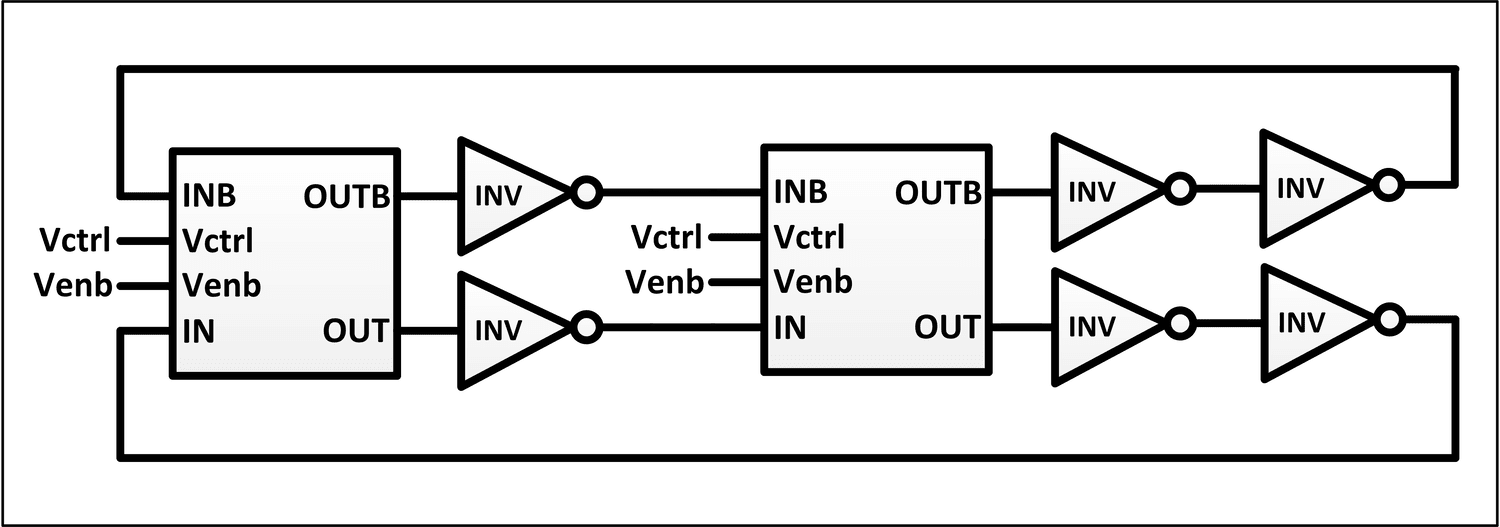

*Fig 10: Schematic of VCO implemented*

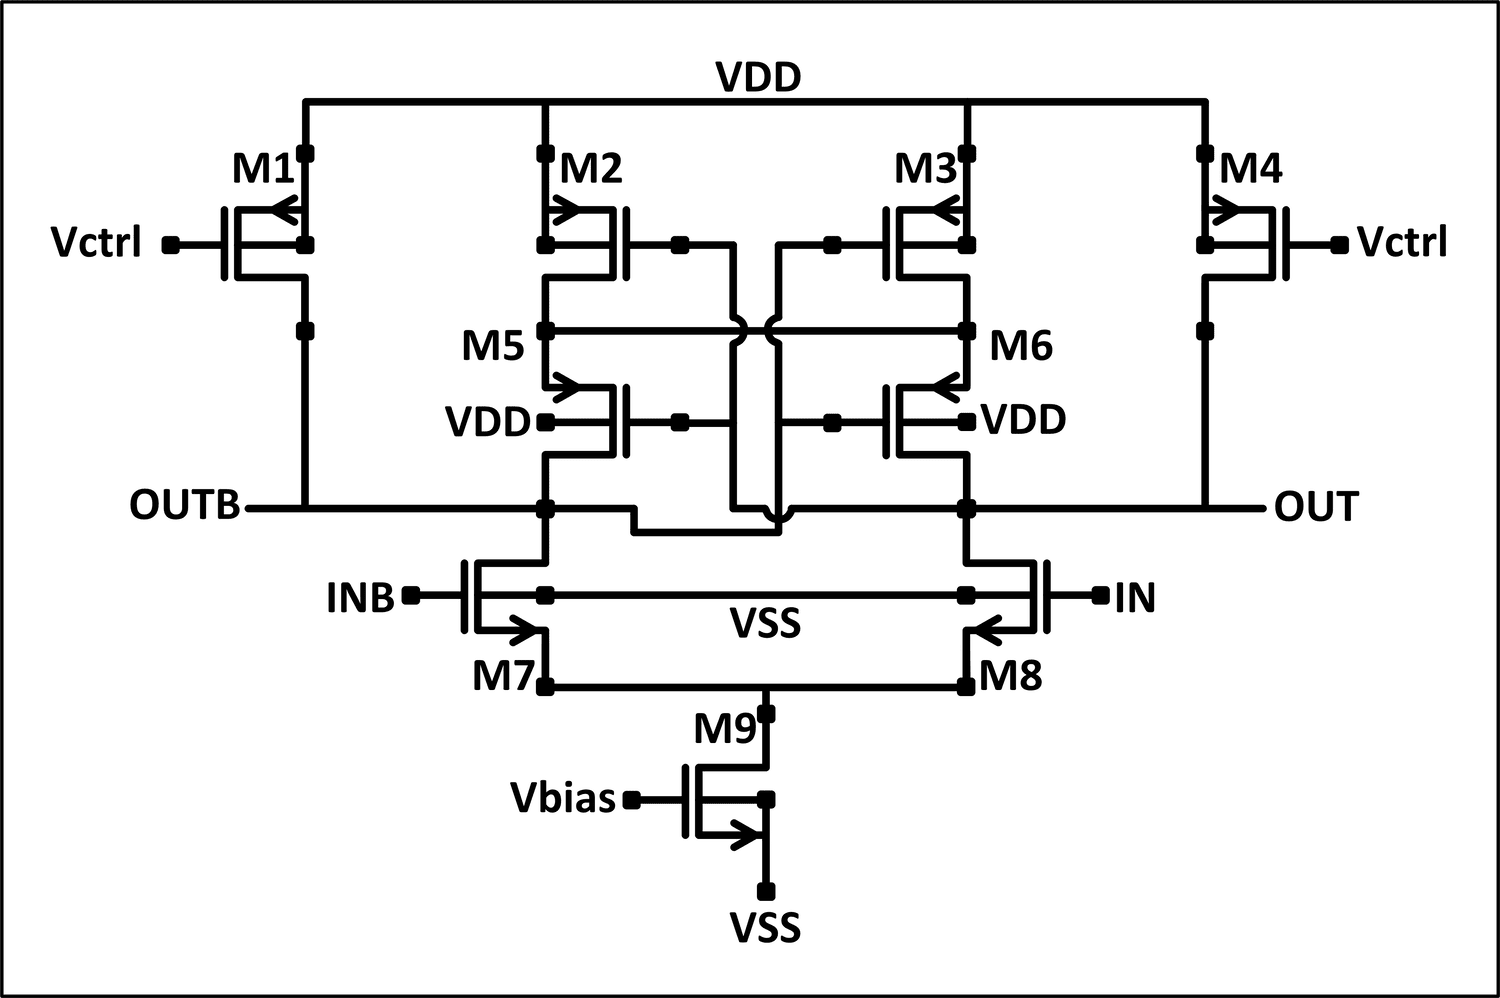

*Fig 11: Schematic of VCO cell*

**Simulation Results:**

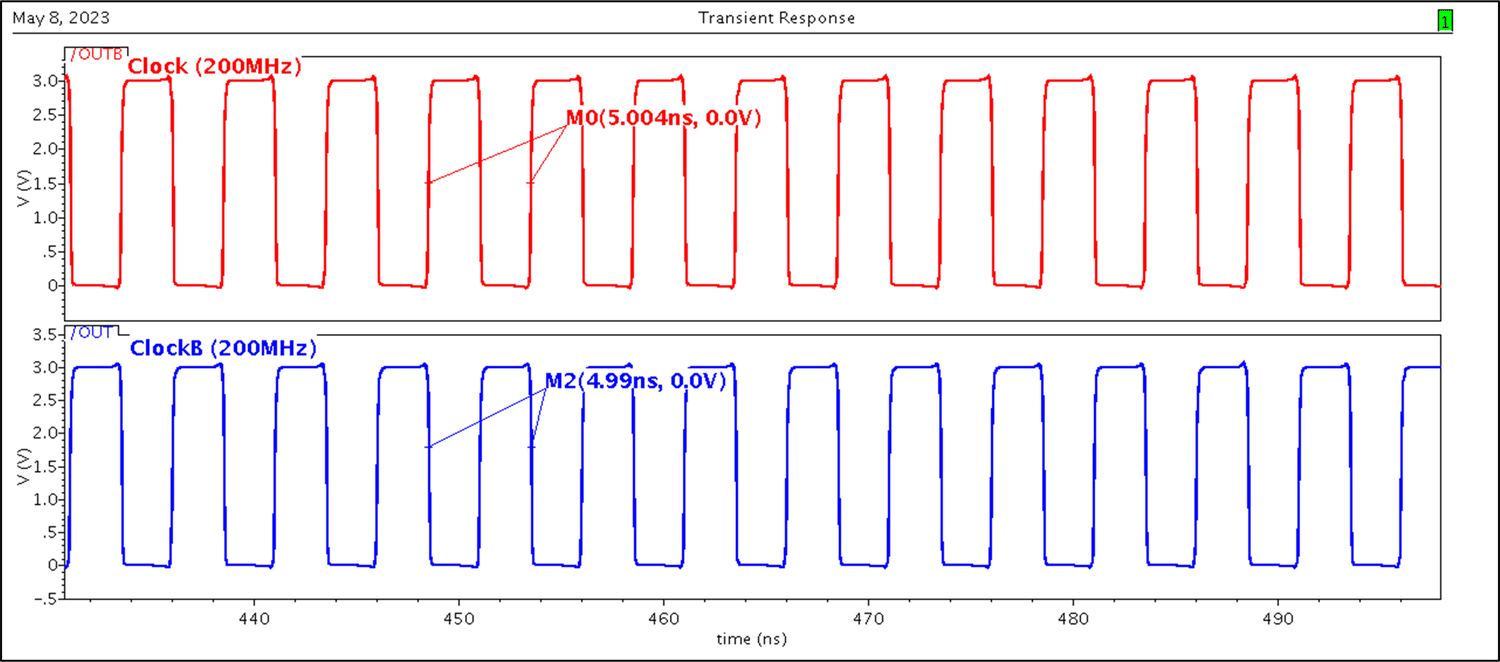

*Fig 12: Output of VCO implemented in TSMC 130nm PDK*

The results displayed in figure 12 showcase the output of the VCO, which is a digital differential clock operating at a frequency of 200MHz. Markers have been placed on the plot to indicate the time difference between the rising edges as well as the falling edges of the clock signal.

**Phase Noise and Jitter Analysis:**

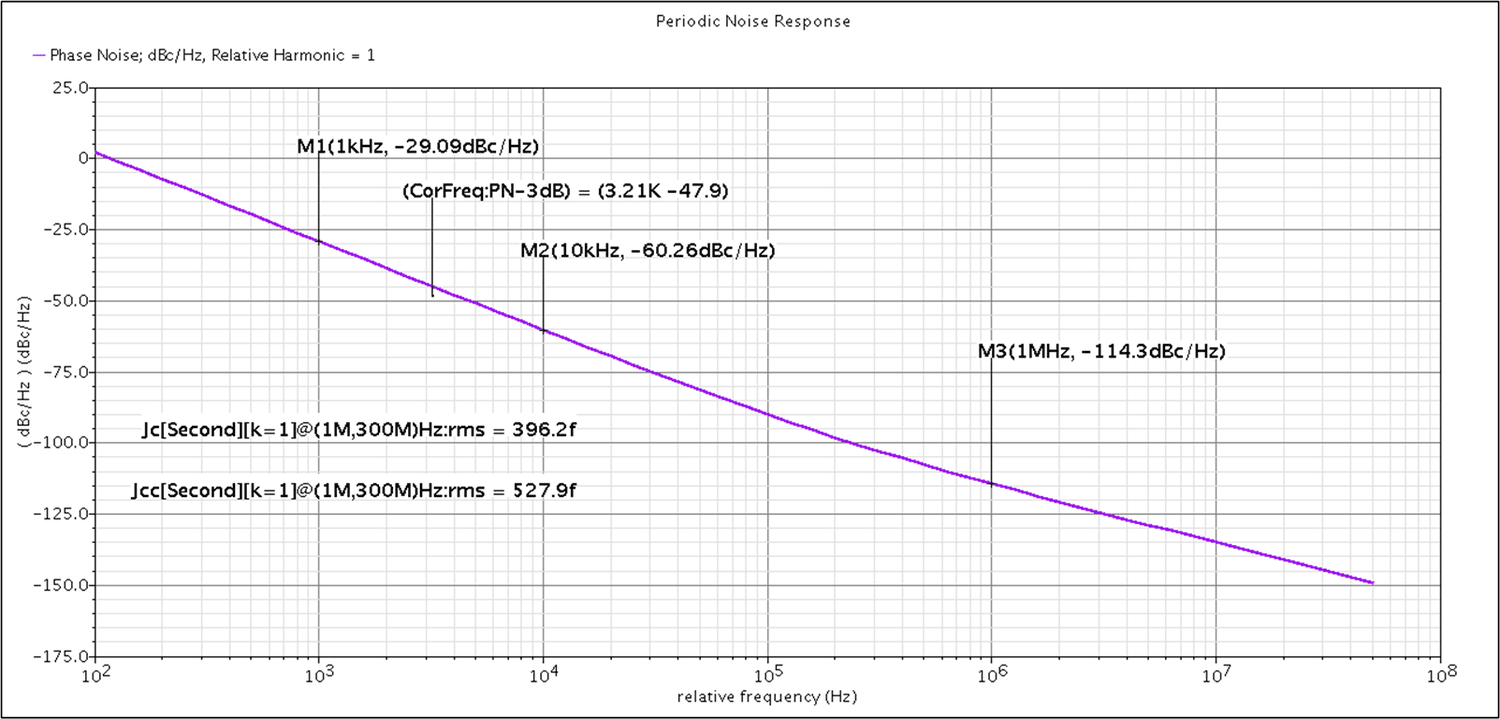

*Fig 13: Phase noise and Jitter analysis of VCO* 

The results depicted in figure 13 present the RMS jitter and phase noise at various offset frequencies. The cycle jitter (Jc) and cycle-to-cycle jitter (Jcc) values are shown, along with the number of cycles (K). Marker M1 represents an offset frequency of 1kHz from the beat frequency of 200MHz, M2 represents an offset of 10kHz, and M3 represents an offset of 1MHz. At an offset frequency of 1MHz from the 200MHz signal, the phase noise is measured to be -114.3dBc/Hz.

###**N-Divider:**

The divider plays a crucial role in a PLL as it compares the PLL output (200 MHz) with the reference frequency (20 MHz). Implementing frequency division at such high frequencies poses a non-trivial challenge due to the significant difference between the VCO output frequency and the reference clock frequency. Various approaches can be employed depending on the desired frequency division.

The simplest method involves designing a digital counter that resets after a specific number of input clock cycles corresponding to the desired division ratio. However, this approach requires additional circuitry for counter resetting and duty cycle adjustment since the duty cycle may not be 50% in most cases.

While this type of frequency divider allows for programmability by dynamically changing the resetting logic and division ratio, we require a fixed division ratio of 10. Therefore, we opted for an alternative configuration that offers fast response, minimum transistor count for reduced power consumption, and minimal area utilization. This configuration utilizes two main blocks:

1.	Half Transparent Register
2.	Latch

The Half Transparent (HT) register introduces varying delays based on its inputs, allowing a logic high to pass through in one clock cycle and a logic low to pass through in two clock cycles. This property enables the implementation of odd dividers by cascading multiple stages of the HT register. For instance, by connecting three HT stages followed by a D flip-flop, a divide by 5 circuit is achieved. The output of this circuit is then directed to a divide by 2 circuit, resulting in a division factor of 10.

To implement the divide by 2 circuit and D flip-flop, we opted for the True Single-Phase Clock (TSPC) methodology. This decision was motivated by the fact that alternative circuits either utilized PMOS stacks or required additional circuitry. TSPC offers advantages such as high speed, absence of clock overlap issues, compact circuitry, and efficient utilization of area.

By combining the HT register with the TSPC-based divide by 2 circuit and D flip-flop, we have successfully achieved the desired division factor of 10. This design approach ensures fast operation, eliminates clock overlap concerns, and minimizes circuitry size while maximizing area efficiency. [5]

**Schematic:**

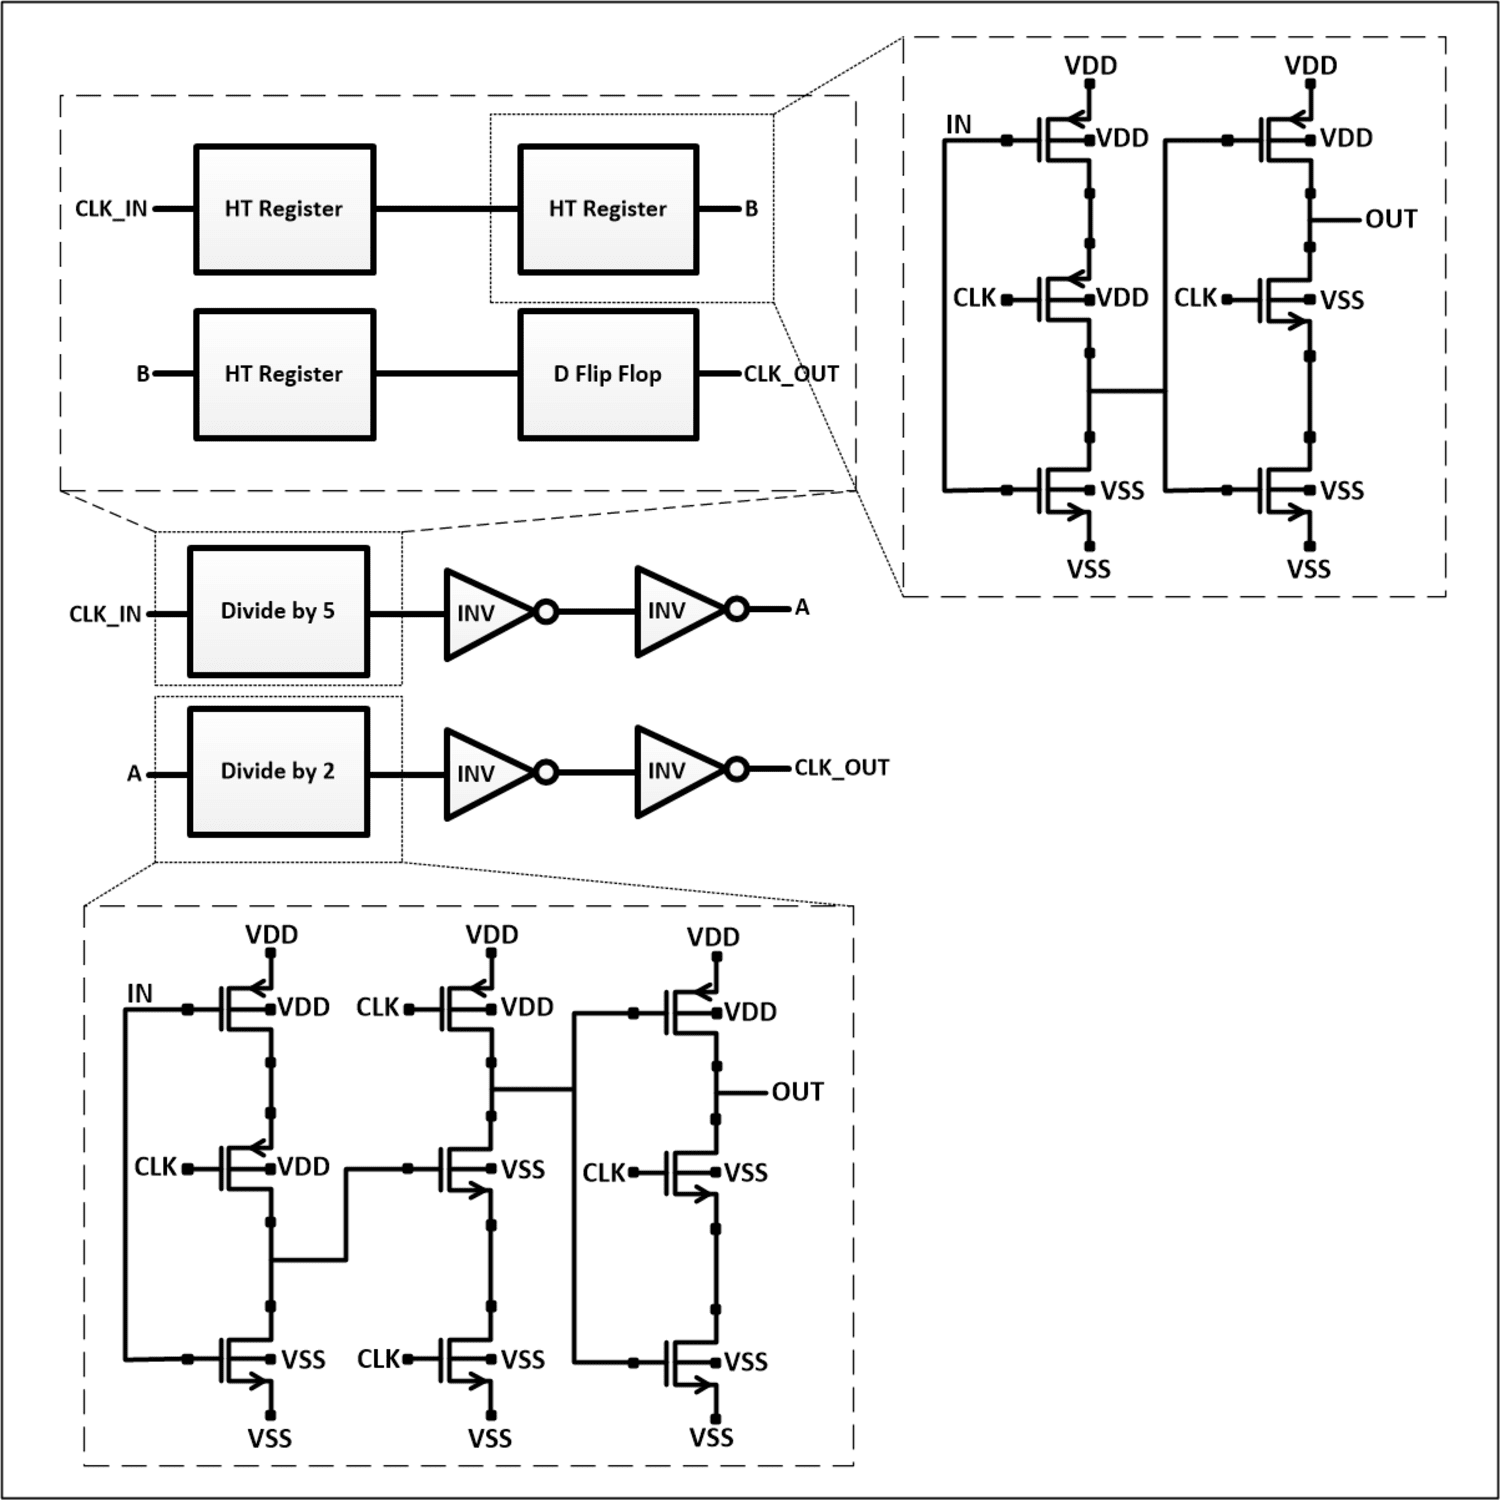

*Fig 14: Schematic of N-Divider (N=10) implemented in TSMC 130nm PDK*

**Results:**

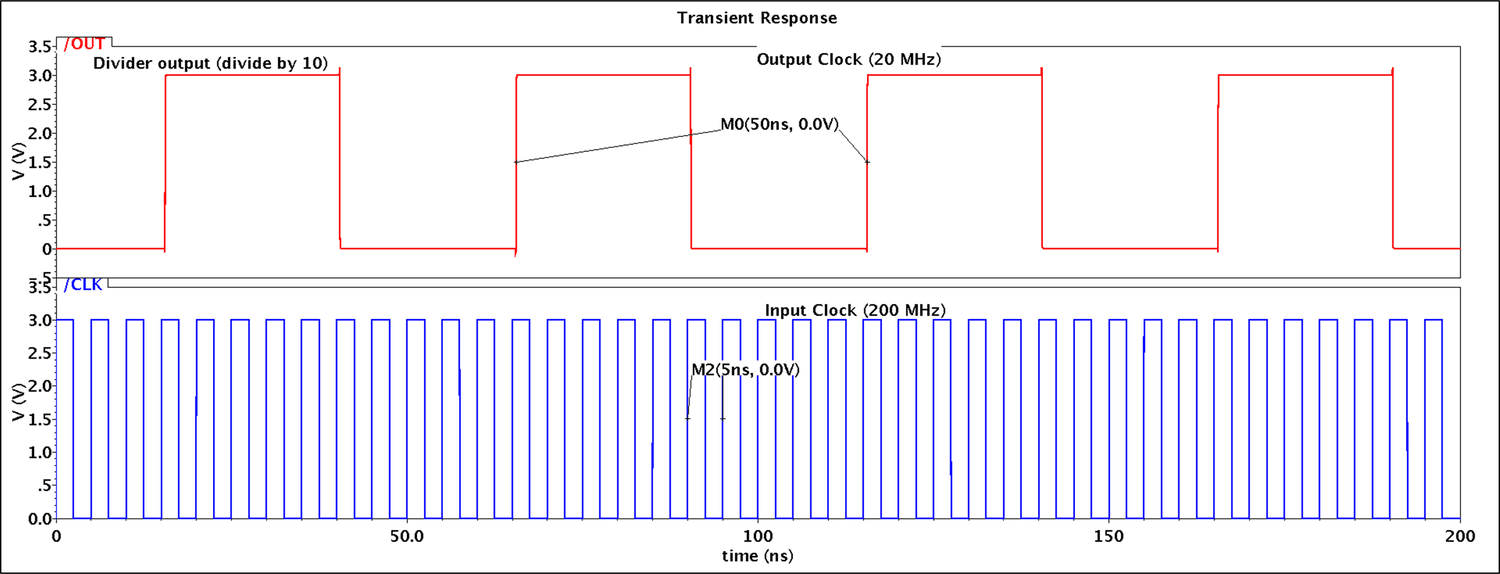

*Fig 15: Output of N-Divider (N=10)*

The results presented in figure 15 demonstrate the simulation of a fixed division by 10. Markers have been placed on the input and output waveforms to indicate the 
time periods of both signals.

We have also implemented a counter-based divider to enhance our design by creating a tunable divider with a frequency range of 180MHz to 220MHz and a step size of 1MHz. The simulation results of the counter-based divider are displayed in figure 16. Markers have been placed to indicate the time period. Division ratios of 2, 4, 8, 16, and 32 are shown below.

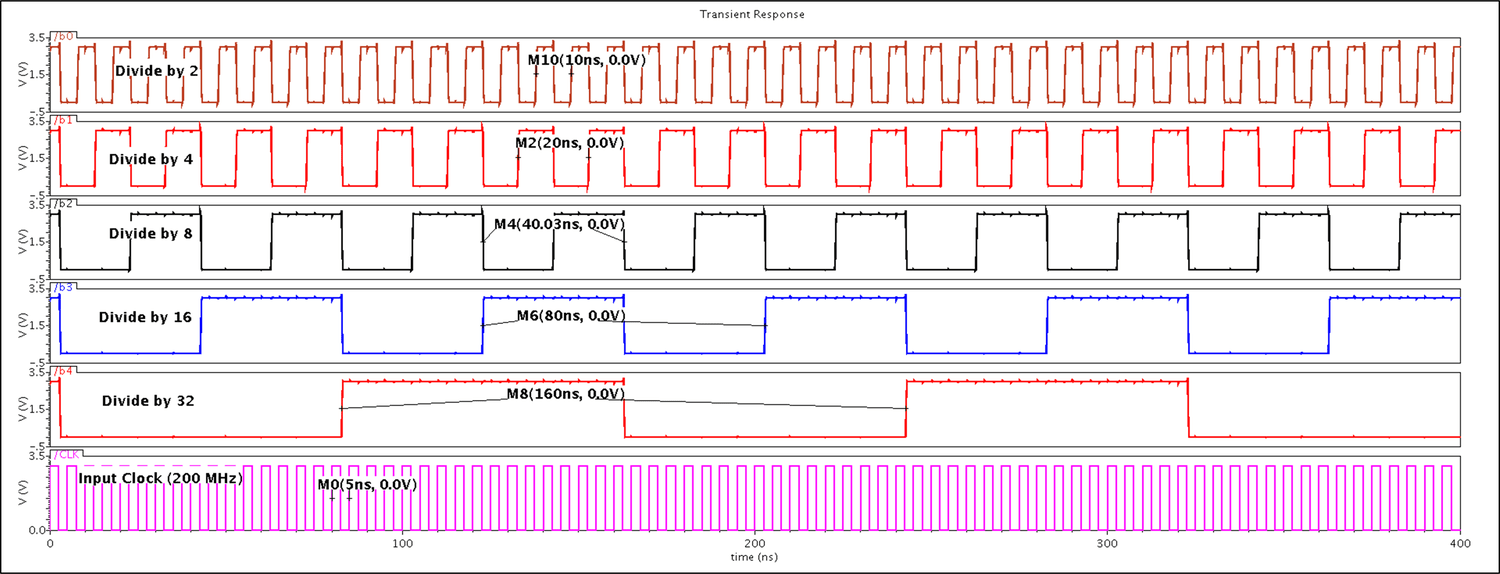

*Fig 16: Results of Counter-based Divider implemented in TSMC 130nm PDK*

Our future plan involves the implementation of PLL with this tunable divider, aiming to make our PLL tunable with a smaller step size and a broader frequency range.



## **Final Simulation Results of Working PLL:**

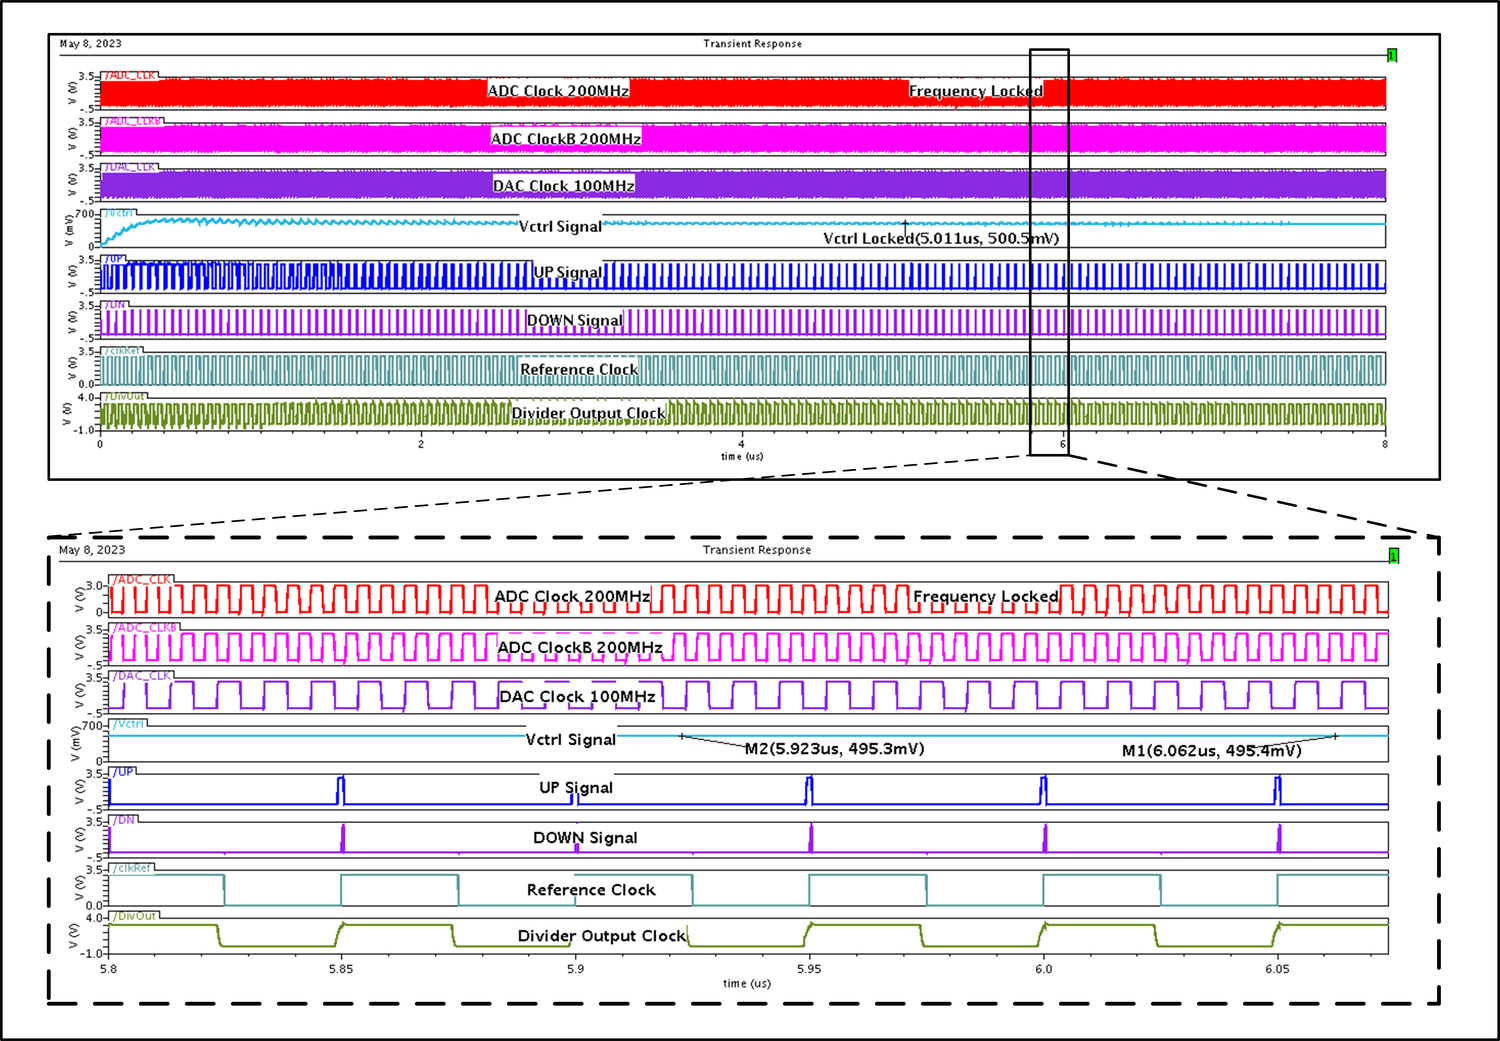

*Fig 17: Output waveform of PLL implemented in TSMC 130nm PDK*

Based on the aforementioned results showing is figure 17, it is evident that both Vctrl signal and frequency have achieved stability after a lock time of approximately 5 microseconds. The subsequent zoomed segment of the results in figure 17 confirms the consistent and stable behavior of the Vctrl signal and frequency. The results indicate a stable 200 MHz differential clock for the ADC and a 100 MHz single-ended clock for the DAC.

The differential clock ADC_CLK and ADC_CLKB are used for the ADC block with a frequency of 200MHz. On the other hand, a single-ended clock DAC_CLK is utilized for the DAC block, operating at a frequency of 100MHz. The UP and DN pulses have a negligible width, indicating that the target frequency has been achieved, and no frequency up or down is required. Furthermore, the Vctrl signal is stable, and the output clocks are locked.

**Corner Simulation Results:**

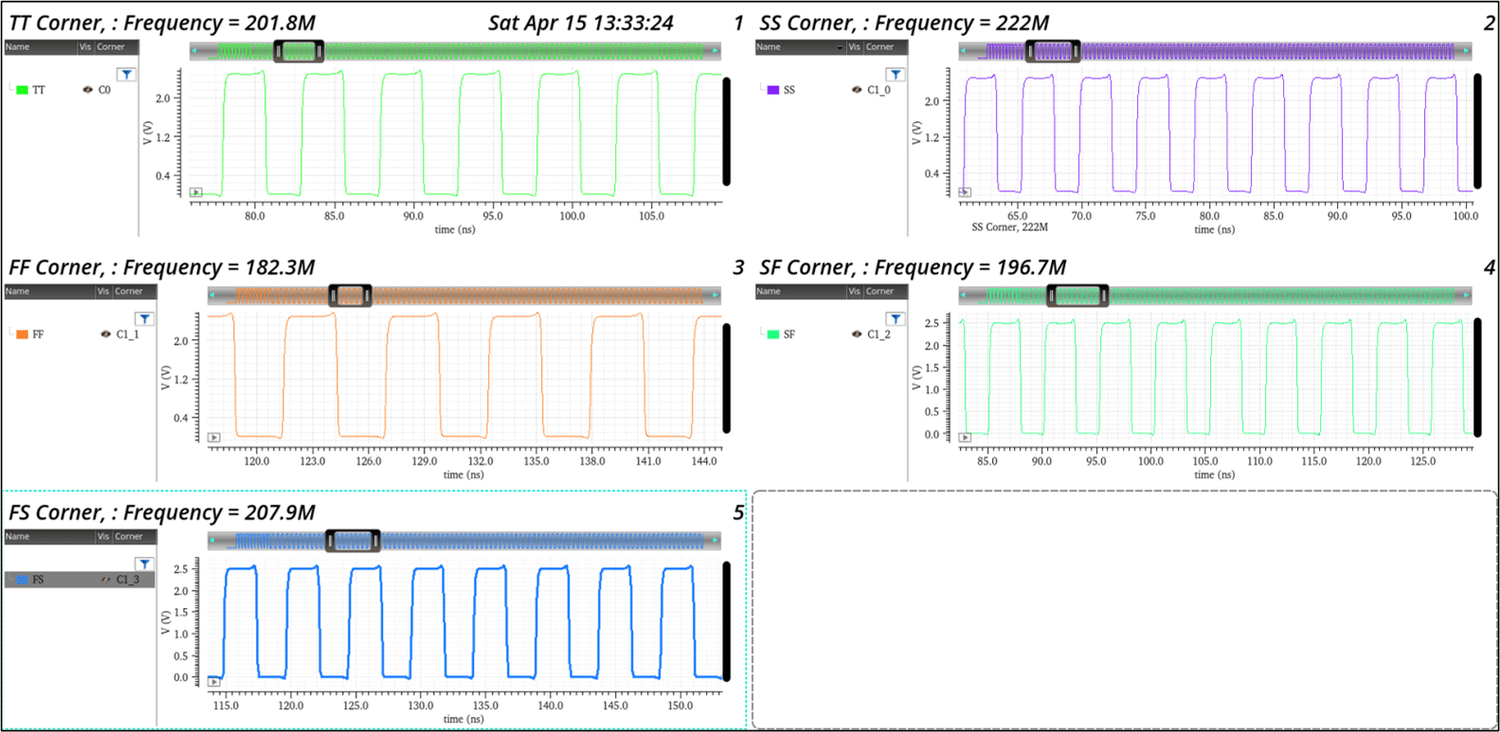

*Fig 19: Corner simulation results of PLL implemented in TSMC 65nm PDK*

The results in figure 19 showcase the outcomes of corner simulations done in TSMC 65nm PDK. Behavior of five corners (TT, SS, FF, SF, FS) and frequency is shown in these results. When maintaining a fixed Vctrl value, the worst-case frequency deviation spans from 182.3 MHz to 222 MHz. Furthermore, the results shown below in figure 20 present the corner simulations where the target frequency remains constant at 200 MHz. In these simulations, Vctrl adjusts itself and achieves lock on different voltage levels associated with each corner, ensuring a consistent 200 MHz clock across all five corners.

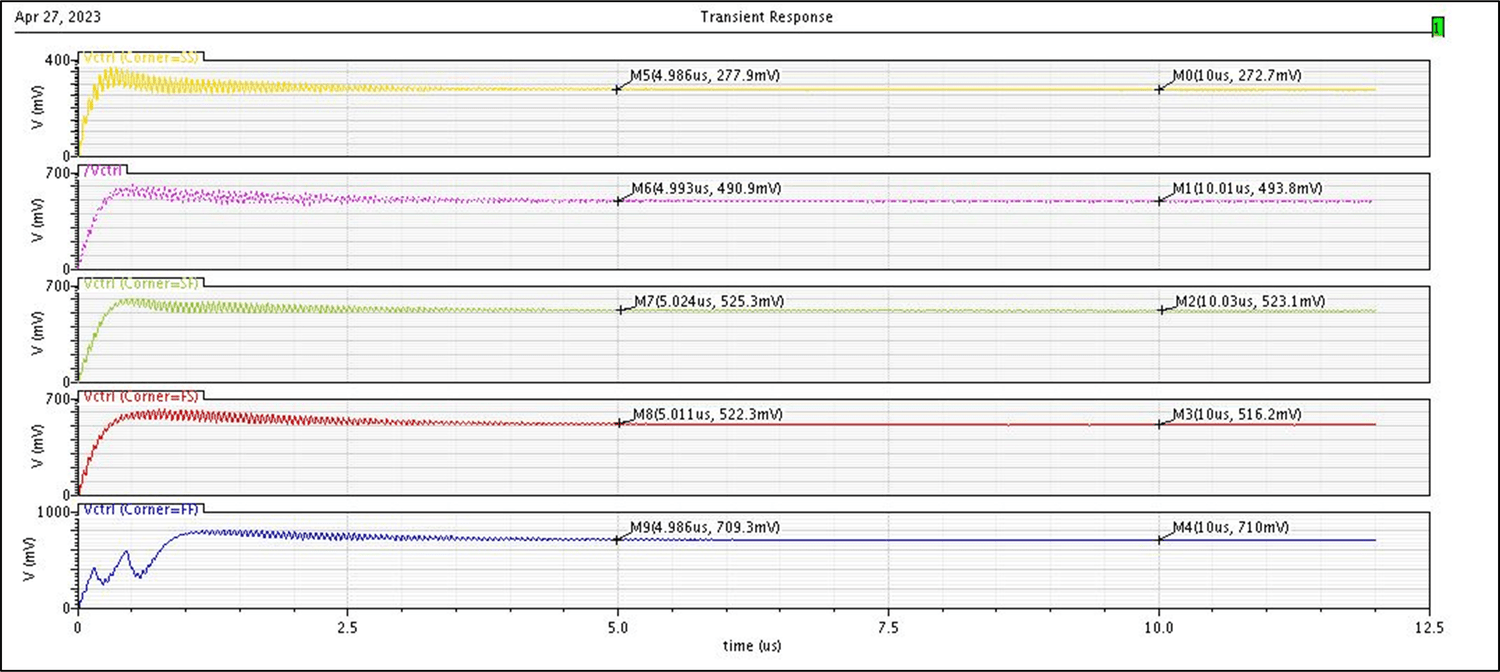

*Fig 20: Vctrl signal behavior on all five process corners*



## **Simulation Results of VCO Block implemented in XSCHEM:**
### **Schematic:**

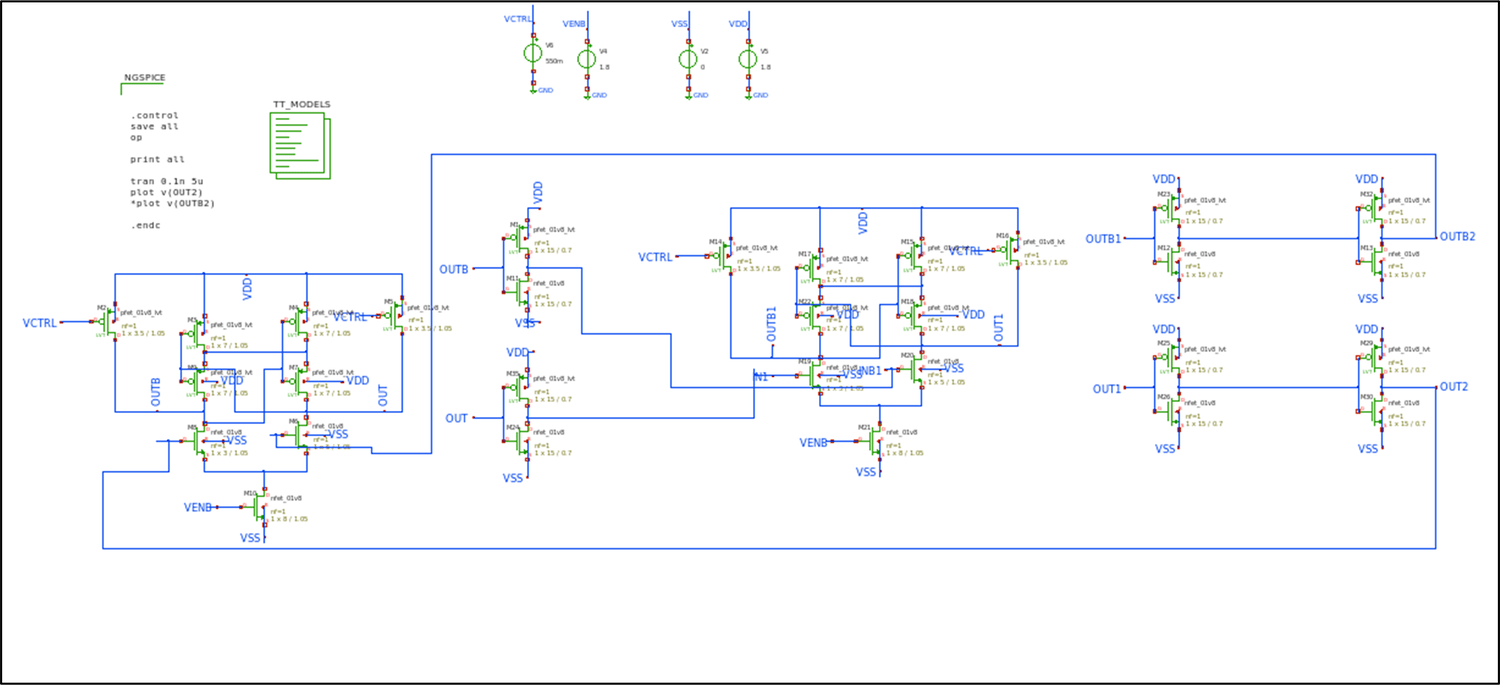

*Fig 21: Schematic and simulation result of VCO block implemented in XSCHEM*

### **Results:**

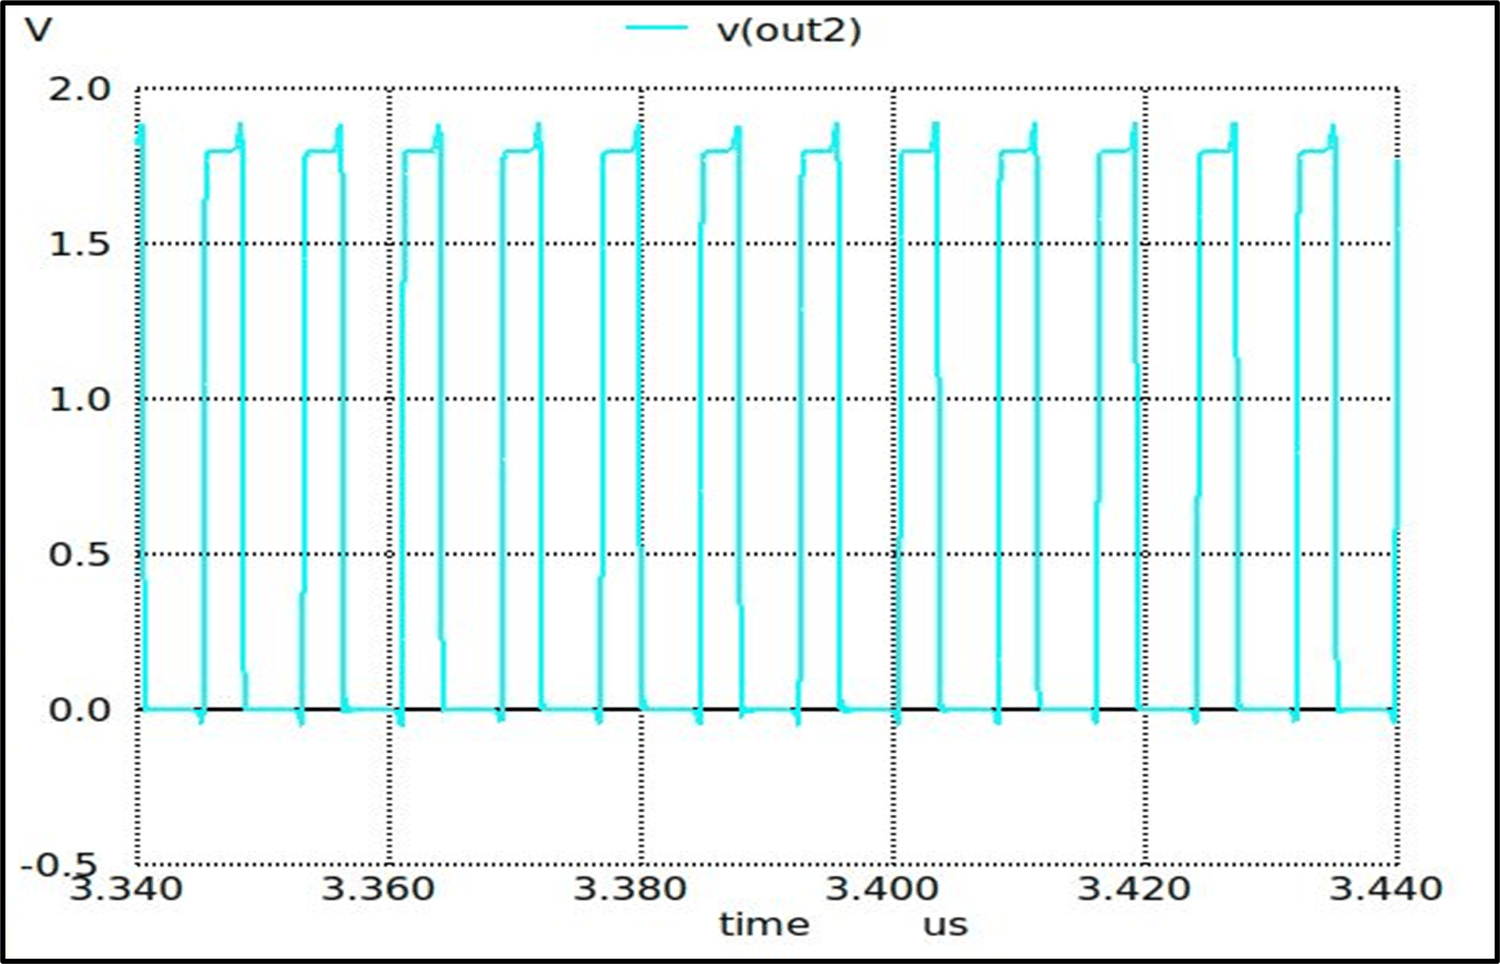

*Fig 22: Simulation result of VCO block implemented in XSCHEM*

Figure 21 illustrates the schematic and figure 22 shows result of the VCO block in the PLL, which was implemented using the open-source tool "XSCHEM". Upon acceptance of the proposal, the complete PLL design will be implemented on the GF180MCU PDK.

##**Conclusion/ Summary:**

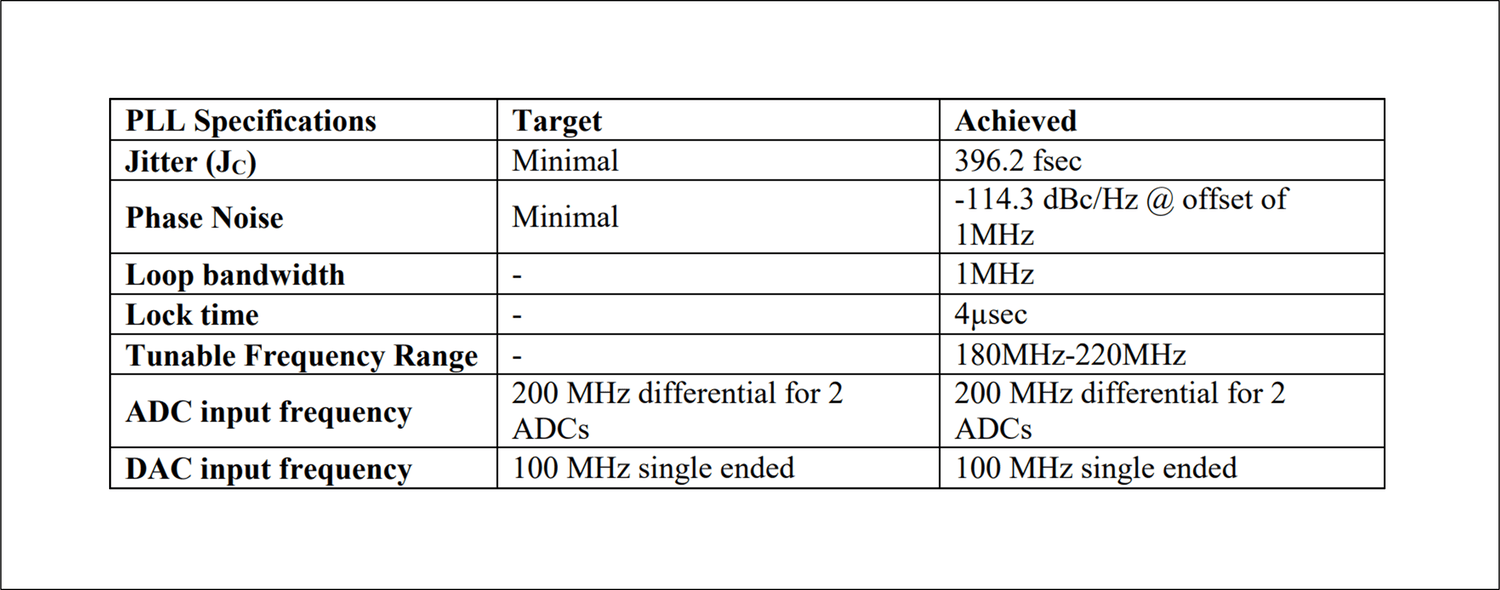



## **References**

[1] 	S. Kim, K. Lee, Y. Moon and D.-K. Jeong, "A 960-Mb/s/pin Interface for Skew-Tolerant Bus," IEEE JOURNAL OF SOLID-STATE CIRCUITS, vol. 32, no. 5, pp. 691-700, 1997. 

[2] 	D. Banerjee, PLL Performance, Simulation, and Design, SNAA106C, 2017. 

[3] 	R. Ramzan, N. Ahsan and J. Dabrowski, "On-Chip Stimulus Generator for Gain, Linearity, and Blocking Profile Test of Wideband RF Front Ends," IEEE Transactions on Instrumentation and Measurement, vol. 59, no. 11, pp. 2870-2876, 2010. 

[4] 	M. B. G. Kumar and D. V. P. K.S, "Design of delay cell for VCO which provides good Figure of Merit," International Journal of Scientific Research and Engineering Development, pp. 156-159, 2022. 

[5] 	. C. Svensson and J. -R. Yuan , "FAST CMOS NONBINARY DIVIDER AND," ELECTRONICS LETTERS, vol. 29, no. 13, pp. 1222-1223, 1993. 

[6]   Kizmaz, M. M., Herencsar, N., & Cicekoglu, O. (2022). Wide-tunable LC-VCO design with a novel active inductor. AEU - International Journal of Electronics and Communications, 154266.

[7]  Lei Zhang, Zongmin Wang, Tieliang Zhang, Xinmang Peng; An improved fast acquisition phase frequency detector for high speed phase-locked loops. AIP Conference Proceedings 18 April 2018; 1955 (1): 040030.

[8] B. Razavi, "TSPC Logic [A Circuit for All Seasons]," in IEEE Solid-State Circuits Magazine, vol. 8, no. 4, pp. 10-13, Fall 2016

[9] A. Homayoun and B. Razavi, "Analysis of Phase Noise in Phase/Frequency Detectors," in IEEE Transactions on Circuits and Systems I: Regular Papers, vol. 60, no. 3, pp. 529-539, March 2013

[10] A. A. Abidi, "Phase Noise and Jitter in CMOS Ring Oscillators," in IEEE Journal of Solid-State Circuits, vol. 41, no. 8, pp. 1803-1816, Aug. 2006

